# Resources Availability Knowledge 


In [1]:
#Dependencies and Set up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#File to Load 
mentalhealth_data_to_load= "Resources/survey.csv"

#Read in Survey Data 
mentalhealth_data= pd.read_csv(mentalhealth_data_to_load)

mentalhealth_data_df= pd.DataFrame(mentalhealth_data)

mentalhealth_data_df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
#Total number of employees
total_employee= len(mentalhealth_data_df)
total_employee

1259

In [3]:
#Create a DataFrame with gender,benefits, wellnessprogram and ability seek out help knowledge 

worker_output= pd.DataFrame(mentalhealth_data_df, columns=["Age","Gender", "benefits",
                                                            "wellness_program", "seek_help"])


worker_output


,Age,Gender,benefits,wellness_program,seek_help
0,37,Female,Yes,No,Yes
1,44,M,Don't know,Don't know,Don't know
2,32,Male,No,No,No
3,31,Male,No,No,No
4,31,Male,Yes,Don't know,Don't know
...,...,...,...,...,...
1254,26,male,No,No,No
1255,32,Male,Yes,No,No
1256,34,male,Yes,No,No
1257,46,f,No,No,No


In [4]:
worker_output["Gender"].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

<AxesSubplot:>

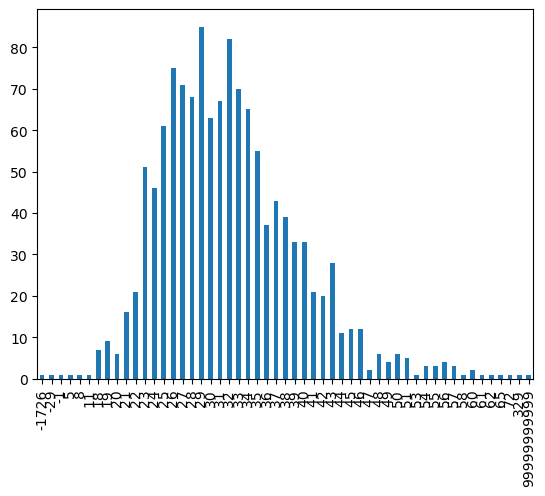

In [5]:
worker_output["Age"].value_counts().sort_index().plot(kind="bar")

(1251, 5)


<AxesSubplot:>

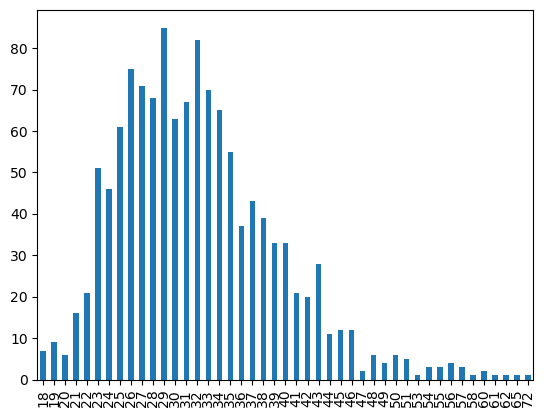

In [6]:
worker_output=worker_output[(worker_output["Age"]>= 18) & (worker_output["Age"]<= 72)].copy()
print(worker_output.shape)
worker_output["Age"].value_counts().sort_index().plot(kind="bar")

In [7]:
bins = [0, 25, 30, 40, 72]
labels = ["Entry Level","Early/Mid Career","Mid Career", "Late Career"]
worker_output['Age Category'] = pd.cut(worker_output['Age'], bins=bins, labels=labels)
worker_output['Age Category'].value_counts()


Mid Career          524
Early/Mid Career    362
Entry Level         217
Late Career         148
Name: Age Category, dtype: int64

In [8]:
#Early career
worker_output_ec= worker_output[worker_output["Age Category"]=="Entry Level"].copy ()
worker_output_ec['seek_help'].value_counts()

No            115
Don't know     73
Yes            29
Name: seek_help, dtype: int64

In [9]:
#Early Career 
ec_b = worker_output_ec['benefits'].value_counts()
ec_wellness = worker_output_ec['wellness_program'].value_counts()
ec_help = worker_output_ec['seek_help'].value_counts()

In [10]:
#Early Career Data Frame 
ec_df= pd.DataFrame({"Benefits": ec_b,
"Wellness Programs": ec_wellness, 
"Seek Help": ec_help})

ec_df

,Benefits,Wellness Programs,Seek Help
Don't know,100,44,73
No,56,141,115
Yes,61,32,29


Text(0.5, 1.0, 'Early Career Worker Knowledge of Mental Health Ressources Provided By Employer')

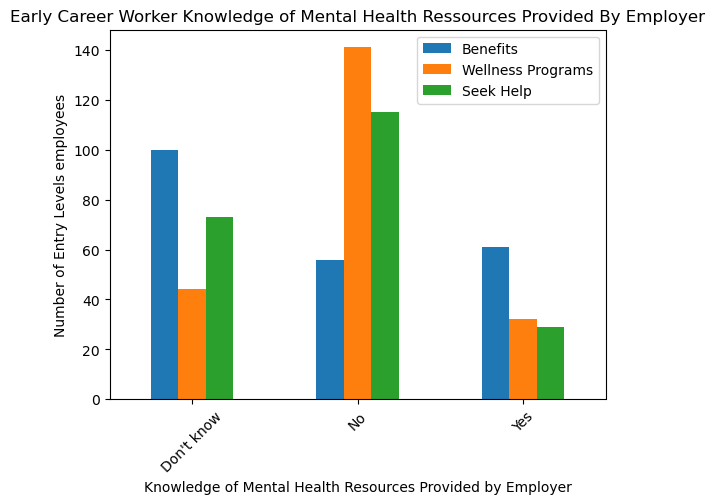

In [11]:
#Early Career Bargraph 
ec_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Resources Provided by Employer')
plt.ylabel('Number of Entry Levels employees')
plt.title('Early Career Worker Knowledge of Mental Health Ressources Provided By Employer')


In [12]:
#Need early mid  data frame by age category 
worker_output_emid= worker_output[worker_output["Age Category"]=="Early/Mid Career"].copy ()

worker_output_emid

,Age,Gender,benefits,wellness_program,seek_help,Age Category
11,29,male,Don't know,No,No,Early/Mid Career
14,27,Male,Don't know,Don't know,Don't know,Early/Mid Career
15,29,female,Yes,No,No,Early/Mid Career
20,29,Male,Yes,No,No,Early/Mid Career
32,30,male,Don't know,No,No,Early/Mid Career
...,...,...,...,...,...,...
1242,28,Male,Don't know,No,Don't know,Early/Mid Career
1249,30,M,Yes,Don't know,No,Early/Mid Career
1250,30,Male,Yes,Yes,Yes,Early/Mid Career
1252,29,male,Yes,Yes,No,Early/Mid Career


In [13]:
#need early mid survey results 
emid_b = worker_output_emid['benefits'].value_counts()
emid_wellness = worker_output_emid['wellness_program'].value_counts()
emid_help = worker_output_emid['seek_help'].value_counts()

In [14]:
#Early/Mid data frame with survey results 

emid_df= pd.DataFrame({"Benefits": emid_b,
"Wellness Programs": emid_wellness, 
"Seek Help": emid_help})

emid_df

,Benefits,Wellness Programs,Seek Help
Don't know,118,49,106
No,120,261,201
Yes,124,52,55


Text(0.5, 1.0, 'Mid/Early Career Worker Knowledge of Mental Health Ressources Provided By Employer')

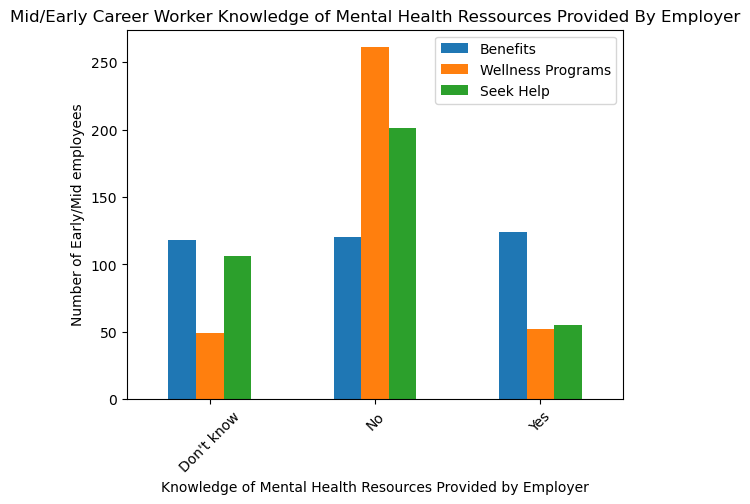

In [30]:
#Early/Mid Available resources data bargraph 
emid_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Resources Provided by Employer')
plt.ylabel('Number of Early/Mid employees')
plt.title('Mid/Early Career Worker Knowledge of Mental Health Ressources Provided By Employer')

In [16]:
# Mid Career  create data frame 
worker_output_mid= worker_output[worker_output["Age Category"]=="Mid Career"].copy ()

worker_output_mid

,Age,Gender,benefits,wellness_program,seek_help,Age Category
0,37,Female,Yes,No,Yes,Mid Career
2,32,Male,No,No,No,Mid Career
3,31,Male,No,No,No,Mid Career
4,31,Male,Yes,Don't know,Don't know,Mid Career
5,33,Male,Yes,No,Don't know,Mid Career
...,...,...,...,...,...,...
1247,36,male,No,No,No,Mid Career
1251,36,Male,No,No,No,Mid Career
1253,36,Male,Don't know,Yes,Yes,Mid Career
1255,32,Male,Yes,No,No,Mid Career


In [17]:
#value counts for responses on survey

mid_b = worker_output_mid['benefits'].value_counts()
mid_wellness = worker_output_mid['wellness_program'].value_counts()
mid_help = worker_output_mid['seek_help'].value_counts()

In [25]:
#mid career data frame 

mid_df= pd.DataFrame({"Benefits": mid_b,
"Welness Programs": mid_wellness, 
"Seek Help": mid_help})

mid_df

,Benefits,Welness Programs,Seek Help
Don't know,146,72,142
No,165,346,271
Yes,213,106,111


Text(0.5, 1.0, 'Mid Career Worker Knowledge of Mental Health Ressources Provided By Employer')

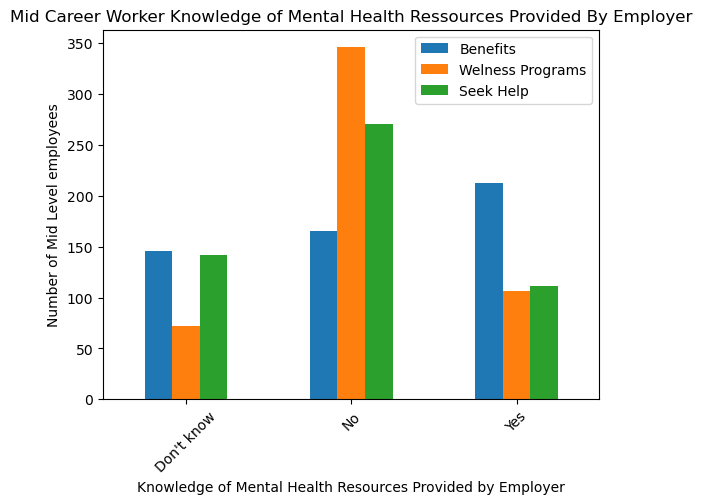

In [29]:
#barchart for mid 
mid_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Resources Provided by Employer')
plt.ylabel('Number of Mid Level employees')
plt.title('Mid Career Worker Knowledge of Mental Health Ressources Provided By Employer')


In [20]:
#late career by age and knowledge of resources 
worker_output_late= worker_output[worker_output["Age Category"]=="Late Career"].copy ()

worker_output_late

,Age,Gender,benefits,wellness_program,seek_help,Age Category
1,44,M,Don't know,Don't know,Don't know,Late Career
8,42,Female,Yes,No,No,Late Career
12,42,female,Yes,No,No,Late Career
18,46,male,Yes,Yes,Don't know,Late Career
22,46,Male,Yes,No,No,Late Career
...,...,...,...,...,...,...
1222,41,female,Don't know,Don't know,Yes,Late Career
1236,60,Male,Don't know,Yes,Don't know,Late Career
1243,43,f,Yes,No,Yes,Late Career
1248,41,Female,Yes,No,Don't know,Late Career


In [21]:
#value counts for responses on survey for late career 

late_b = worker_output_late['benefits'].value_counts()
late_wellness = worker_output_late['wellness_program'].value_counts()
late_help = worker_output_late['seek_help'].value_counts()

In [22]:
#Late career data frame 
late_df= pd.DataFrame({"Benefits": late_b,
"Welness Programs": late_wellness, 
"Seek Help": late_help})

late_df

,Benefits,Welness Programs,Seek Help
Don't know,43,22,42
No,30,89,54
Yes,75,37,52


Text(0.5, 1.0, 'Late Career Worker Knowledge of Mental Health Ressources Provided By Employer')

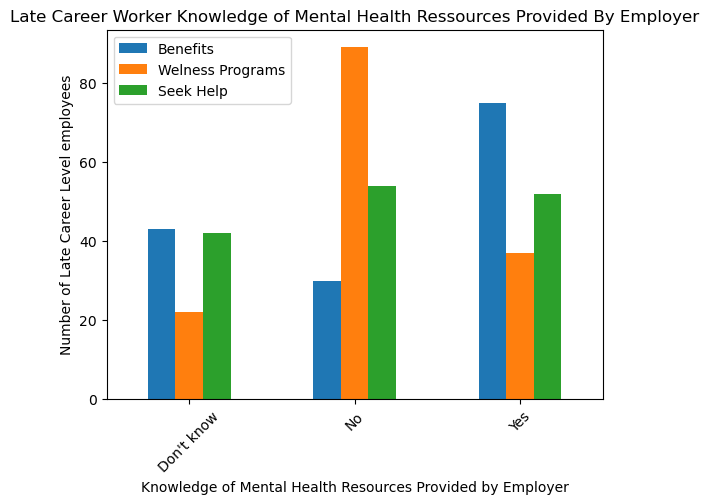

In [28]:
#barchart for late
late_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Resources Provided by Employer')
plt.ylabel('Number of Late Career Level employees')
plt.title('Late Career Worker Knowledge of Mental Health Ressources Provided By Employer')